In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
# Example: Get Apple stock data from Jan 2020
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
df = df[['Close', 'Volume']]
df.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [15]:
df.head(10)

Price,Close,Volume
Ticker,AAPL,AAPL
Date,,
2020-01-02,72.716064,135480400
2020-01-03,72.009132,146322800
2020-01-06,72.582893,118387200
2020-01-07,72.241539,108872000
2020-01-08,73.403633,132079200
2020-01-09,74.962791,170108400
2020-01-10,75.132263,140644800
2020-01-13,76.737411,121532000


In [16]:
##FEATURE ENGINEERING
# Create lag features
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)
df['lag_3'] = df['Close'].shift(3)

# Rolling mean
df['rolling_mean_3'] = df['Close'].rolling(window=3).mean()

# Drop rows with NaN values (created due to shift and rolling)
df.dropna(inplace=True)

# Define features and target
X = df[['lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'Volume']]
y = df['Close']  # Predicting today's Close

In [17]:
split = int(0.8 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [18]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [19]:
y_pred = model.predict(X_test)

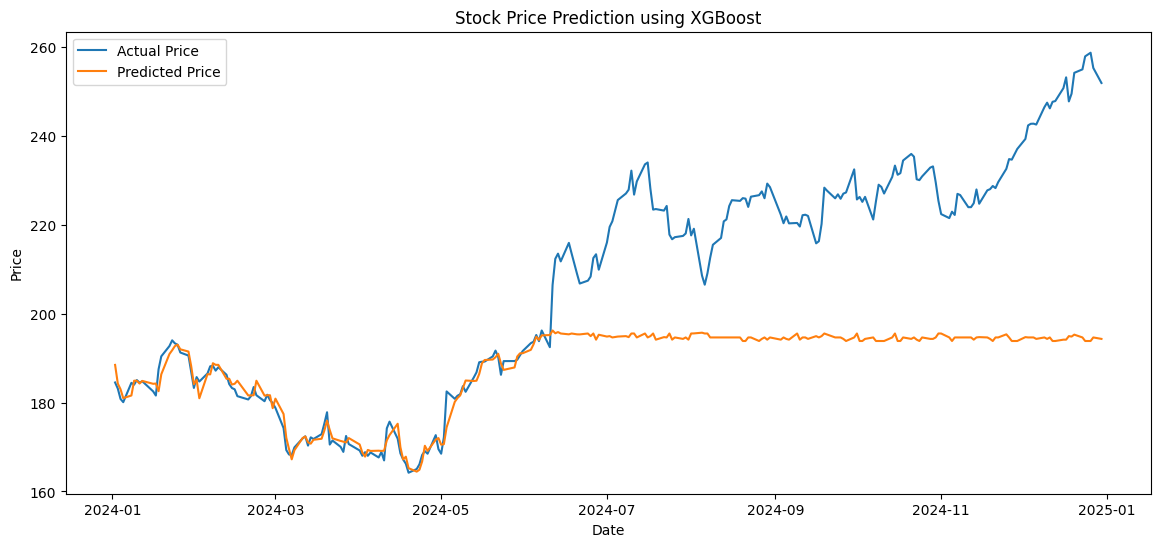

In [20]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.legend()
plt.title("Stock Price Prediction using XGBoost")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()